<a href="https://colab.research.google.com/github/aisaack/implementation/blob/main/VGGNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# VGGNet
## Reference
1. paper: https://arxiv.org/pdf/1409.1556.pdf

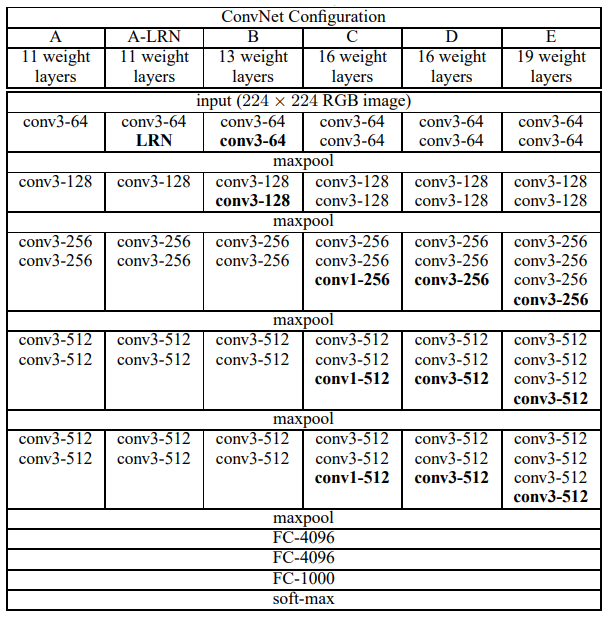

모델에 있는 모든 conv layer는 (3, 3)크기의 kernel를 1만큼 도약하게 했다.

In [1]:
import tensorflow as tf
model = tf.keras.Sequential([
                          tf.keras.layers.InputLayer(input_shape = [224, 224, 3], batch_size = 256),
                          tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, strides = (1, 1), padding = 'same', activation = 'relu'),
                          tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, strides = (1, 1), padding = 'same', activation = 'relu'),
                          tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = 2),
                          tf.keras.layers.Conv2D(filters = 128, kernel_size = 3, strides = (1, 1), padding = 'same', activation = 'relu'),
                          tf.keras.layers.Conv2D(filters = 128, kernel_size = 3, strides = (1, 1), padding = 'same', activation = 'relu'),
                          tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = 2),
                          tf.keras.layers.Conv2D(filters = 256, kernel_size = 3, strides = (1, 1), padding = 'same', activation = 'relu'),
                          tf.keras.layers.Conv2D(filters = 256, kernel_size = 3, strides = (1, 1), padding = 'same', activation = 'relu'),
                          tf.keras.layers.Conv2D(filters = 256, kernel_size = 3, strides = (1, 1), padding = 'same', activation = 'relu'),
                          tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = 2),
                          tf.keras.layers.Conv2D(filters = 512, kernel_size = 3, strides = (1, 1), padding = 'same', activation = 'relu'),
                          tf.keras.layers.Conv2D(filters = 512, kernel_size = 3, strides = (1, 1), padding = 'same', activation = 'relu'),
                          tf.keras.layers.Conv2D(filters = 512, kernel_size = 3, strides = (1, 1), padding = 'same', activation = 'relu'),
                          tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = 2),
                          tf.keras.layers.Conv2D(filters = 512, kernel_size = 3, strides = (1, 1), padding = 'same', activation = 'relu'),
                          tf.keras.layers.Conv2D(filters = 512, kernel_size = 3, strides = (1, 1), padding = 'same', activation = 'relu'),
                          tf.keras.layers.Conv2D(filters = 512, kernel_size = 3, strides = (1, 1), padding = 'same', activation = 'relu'),
                          tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = 2),
                          tf.keras.layers.Flatten(),
                          tf.keras.layers.Dense(4096, activation = 'relu'),
                          tf.keras.layers.Dropout(0.5),
                          tf.keras.layers.Dense(4096, activation = 'relu'),
                          tf.keras.layers.Dropout(0.5),
                          tf.keras.layers.Dense(1000, activation = 'softmax'),
])

In [2]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (256, 224, 224, 64)       1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (256, 224, 224, 64)       36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (256, 112, 112, 64)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (256, 112, 112, 128)      73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (256, 112, 112, 128)      147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (256, 56, 56, 128)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (256, 56, 56, 256)        2

D모델을 구현했는데 이제는 이렇게 단순한 모델이 드물다. 아마 이렇게 구현하는 건 마지막이지 않을까 생각한다. GoogLeNet부터 모듈단위로 쌓는 개념이라 클레스 변수로 블럭을 생성하고 규칙에 따라 블럭을 죽 나열하는 식에 가깝다.

모델 설계에 규칙성이 모인다면 이렇게 구현하기도 한다. layer수는 늘었지만 오히려 코드량은 절반이상 줄어드는 마법!

In [5]:
n_layer = [2, 2, 4, 4, 4]
n_filter = [64, 128, 256, 512, 512]
model2 = tf.keras.Sequential(tf.keras.layers.InputLayer(input_shape = [224, 224, 3], batch_size = 256))
for layer, filter in zip(n_layer, n_filter):
  for _ in range(layer):
    model2.add(tf.keras.layers.Conv2D(filters = filter, kernel_size = 3, strides = (1, 1), padding = 'same', activation = 'relu'))
  model2.add(tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = 2))
model2.add(tf.keras.layers.Flatten())
for _ in range(2):
  model2.add(tf.keras.layers.Dense(units = 4096, activation = 'relu'))
  model2.add(tf.keras.layers.Dropout(0.5))
model2.add(tf.keras.layers.Dense(units = 1000, activation = 'softmax'))

In [6]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (256, 224, 224, 64)       1792      
_________________________________________________________________
conv2d_30 (Conv2D)           (256, 224, 224, 64)       36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (256, 112, 112, 64)       0         
_________________________________________________________________
conv2d_31 (Conv2D)           (256, 112, 112, 128)      73856     
_________________________________________________________________
conv2d_32 (Conv2D)           (256, 112, 112, 128)      147584    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (256, 56, 56, 128)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (256, 56, 56, 256)       